# Trabalho Prático 1 de Ciência de Dados

## Download e leitura

#### Download dos dados

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg' -O filmes.csv

--2025-02-12 10:21:46--  https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg
Resolving docs.google.com (docs.google.com)... 142.250.78.238, 2800:3f0:4001:845::200e
Connecting to docs.google.com (docs.google.com)|142.250.78.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download [following]
--2025-02-12 10:21:46--  https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.79.161, 2800:3f0:4001:836::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.79.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11380332 (11M) [application/octet-stream]
Saving to: ‘filmes.csv’

filmes.csv          100%[===================>]  10.85M  20.0MB/s    in 0.5s    

202

#### Leitura dos dados

In [2]:
import pandas as pd

filmes_df = pd.read_csv("filmes.csv")
# filmes_df = filmes_df.sample(n=10000)
filmes_df.head()

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names
0,Family,7.1,387992,When two kids find and play a magical board ga...,Jumanji,1995,104,['Robin Williams' 'Jonathan Hyde' 'Jonathan Hy...,['Joe Johnston']
1,Romance,6.7,30265,John and Max resolve to save their beloved bai...,Grumpier Old Men,1995,101,['Walter Matthau' 'Jack Lemmon' 'Burgess Mered...,['Howard Deutch']
2,Romance,6.0,12585,"Based on Terry McMillan's novel, this film fol...",Waiting to Exhale,1995,124,['Gregory Hines' 'Dennis Haysbert' 'Mykelti Wi...,['Forest Whitaker']
3,"Romance,Family",6.1,42555,George Banks must deal not only with his daugh...,Father of the Bride Part II,1995,106,['Steve Martin' 'Martin Short' 'George Newbern...,['Charles Shyer']
4,"Crime,Action",8.3,738636,A group of high-end professional thieves start...,Heat,1995,170,['Al Pacino' 'Robert De Niro' 'Val Kilmer' 'Jo...,['Michael Mann']


## Pré-processamento dos dados

In [3]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /home/alant/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
from nltk import sent_tokenize, word_tokenize

#### Extrair sinopse do dataframe

In [5]:
sinopses = filmes_df.sinopse
sinopses.head()

0    When two kids find and play a magical board ga...
1    John and Max resolve to save their beloved bai...
2    Based on Terry McMillan's novel, this film fol...
3    George Banks must deal not only with his daugh...
4    A group of high-end professional thieves start...
Name: sinopse, dtype: object

In [6]:
sinopses.shape

(30358,)

#### Convertendo os tokens

In [7]:
!pip install unidecode

In [8]:
import string
import unidecode

Convertendo todos os tokens para letras minúsculas

In [9]:
def tokens_low(tokens):
  return [w.lower() for w in tokens]

Removendo os símbolos de pontuação

In [10]:
table = str.maketrans('', '', string.punctuation)

In [11]:
def tokens_pontuacao(tokens):
  return [w.translate(table) for w in tokens]

Convertendo carcteres especiais

In [12]:
def tokens_char_especical(tokens):
  return [unidecode.unidecode(w).lower() for w in tokens]

#### Filtrando apenas palavras

Extraindo apenas as palavras da lista de tokens

In [13]:
def tokens_apenas_words(tokens):
  return [word for word in tokens if word.isalpha()]

Removendo stop words

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/alant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
def tokens_stop_words(tokens):
  return [word for word in tokens if not word in stop_words]

#### Stemming

In [17]:
from nltk.stem.porter import PorterStemmer

In [18]:
porter = PorterStemmer()

In [19]:
def tokens_stemming(tokens):
  return [porter.stem(word) for word in tokens]

#### Tokenizer Personalizado

In [20]:
def tokenizer_personalizado(texto):
  tokens = word_tokenize(texto)

  tokens = tokens_low(tokens)
  tokens = tokens_pontuacao(tokens)
  tokens = tokens_char_especical(tokens)
  tokens = tokens_apenas_words(tokens)
  tokens = tokens_stop_words(tokens)
  tokens = tokens_stemming(tokens)

  return tokens

## Construção da matriz de TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Cada linha do array é uma sinopse
D = [sin for sin in filmes_df.sinopse]

### Usando Tokenizer Personalizado

In [23]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer_personalizado)
X = vectorizer.fit_transform(D)

/home/alant/workdir/GitHub/jup_env/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(30358, 33435))

In [25]:
vectorizer.get_feature_names_out()

array(['aa', 'aadhavan', 'aadhi', ..., 'zylberberg', 'zylberstein',
       'zyto'], shape=(33435,), dtype=object)

In [26]:
df = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
df

,aa,aadhavan,aadhi,aakansha,aakash,aaliya,aalst,aaltonen,aamir,aang,...,zuzu,zvezda,zweig,zydruna,zyga,zygon,zyl,zylberberg,zylberstein,zyto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Redução de dimensionalidade

In [27]:
import matplotlib.pyplot as plt
import numpy as np

### Usando PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
# pca = PCA(n_components=3500)

In [30]:
# pca.fit(X)

In [31]:
# fig = plt.figure(figsize=(7, 5))
# plt.plot([i for i in range(1, pca.n_components + 1)], np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel(r'$k$ - Número de componentes principais')
# plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')

In [32]:
# X_REDUCED = pca.transform(X)

In [33]:
# X_REDUCED

### Usando SVD

In [34]:
from sklearn.decomposition import TruncatedSVD

In [35]:
svd = TruncatedSVD(n_components=1000)

In [36]:
svd.fit(X)

TruncatedSVD(n_components=1000)

Text(0, 0.5, '$f(k)$ - Fração cumulativa da variância explicada')

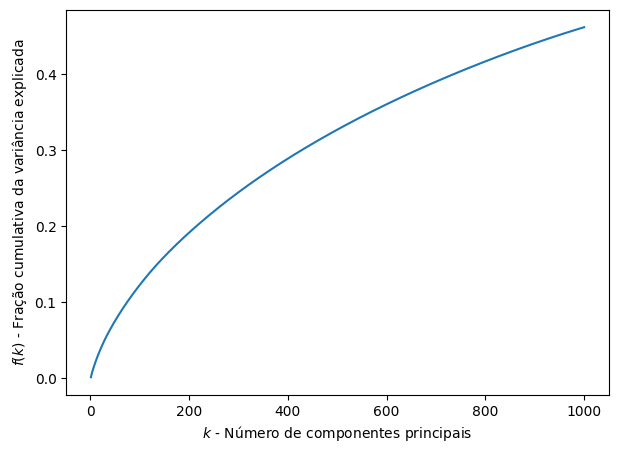

In [37]:
fig = plt.figure(figsize=(7, 5))
plt.plot([i for i in range(1, svd.n_components + 1)], np.cumsum(svd.explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')

In [38]:
X_REDUCED = svd.transform(X)

In [39]:
X_REDUCED

array([[ 0.13651584, -0.02515028,  0.00916659, ...,  0.00539265,
         0.01834369,  0.01898564],
       [ 0.06462913, -0.02665436, -0.0189353 , ...,  0.05818375,
         0.00640071, -0.03680617],
       [ 0.07566678,  0.00652855, -0.05329019, ..., -0.01732241,
         0.0020357 ,  0.01299901],
       ...,
       [ 0.03782908, -0.03134481,  0.00390199, ...,  0.0338368 ,
        -0.01889692, -0.00083358],
       [ 0.15564255,  0.07035251,  0.10812092, ..., -0.00079461,
         0.01946579, -0.01335696],
       [ 0.09024042, -0.04148301, -0.01710452, ...,  0.01097725,
        -0.00608499,  0.00472914]], shape=(30358, 1000))

## Verificando os Generos

In [40]:
all_filmes_g = filmes_df.genres
all_filmes_g

0                Family
1               Romance
2               Romance
3        Romance,Family
4          Crime,Action
              ...      
30353         Biography
30354         Biography
30355      Crime,Horror
30356           Romance
30357            Action
Name: genres, Length: 30358, dtype: object

In [41]:
# Generos sem repetições
ggg_set = set()

for g in all_filmes_g:
    if g not in ggg_set:
        ggg_set.add(g)

print(len(ggg_set))
ggg_set

73


{'Action',
 'Action,Family',
 'Biography',
 'Biography,Action',
 'Biography,Family',
 'Crime',
 'Crime,Action',
 'Crime,Action,Family',
 'Crime,Biography',
 'Crime,Biography,Action',
 'Crime,Family',
 'Crime,Horror',
 'Crime,Horror,Action',
 'Crime,Musical,Horror',
 'Crime,Romance,Horror',
 'Crime,Sci-Fi,Horror',
 'Family',
 'Horror',
 'Horror,Action',
 'Horror,Action,Family',
 'Horror,Biography',
 'Horror,Crime',
 'Horror,Family',
 'Musical',
 'Musical,Action',
 'Musical,Biography',
 'Musical,Biography,Family',
 'Musical,Crime',
 'Musical,Crime,Action',
 'Musical,Family',
 'Musical,Horror',
 'Musical,Romance',
 'Musical,Romance,Action',
 'Musical,Romance,Crime',
 'Musical,Romance,Family',
 'Musical,Sci-Fi',
 'Musical,Sci-Fi,Horror',
 'Romance',
 'Romance,Action',
 'Romance,Biography',
 'Romance,Crime',
 'Romance,Crime,Action',
 'Romance,Crime,Family',
 'Romance,Family',
 'Romance,Horror',
 'Romance,Horror,Action',
 'Romance,Horror,Sci-Fi',
 'Romance,Sci-Fi',
 'Romance,Sci-Fi,Action',


In [42]:
# Generos Reais
genres_set = set()
for filme_g in all_filmes_g:
    gs = filme_g.split(sep=',')
    for g in gs:
        if g not in genres_set:
            genres_set.add(g)

print(len(genres_set))
genres_set

9


{'Action',
 'Biography',
 'Crime',
 'Family',
 'Horror',
 'Musical',
 'Romance',
 'Sci-Fi',
 'Sport'}

## K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 90)
kmeans.fit(X_REDUCED)
y_kmeans = kmeans.predict(X_REDUCED)

### Verificando o K-means

In [ ]:
import sklearn.metrics as metrics
import seaborn as sns

In [ ]:
euclidean_dists = metrics.euclidean_distances(X_REDUCED)
euclidean_dists